# Airline Flight Data Analysis

This notebook analyzes a dataset of airline flights to extract insights into flight prices, airline performance, and other travel-related patterns. The analysis covers data cleaning, exploratory data analysis, and key findings.

## 1. Data Loading and Initial Exploration

We begin by loading the dataset and performing an initial exploration to understand its structure and contents. The dataset includes the following columns:- **airline**: The name of the airline.- **flight**: The flight number.- **source_city**: The city from which the flight departs.- **departure_time**: The time of day when the flight departs.- **stops**: The number of stops before the destination.- **arrival_time**: The time of day when the flight arrives.- **destination_city**: The city to which the flight arrives.- **class**: The class of the flight (Economy or Business).- **duration**: The duration of the flight in hours.- **days_left**: The number of days left before the flight departure.- **price**: The price of the flight ticket.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [16]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## 2. Data Cleaning

In this section, we clean the data to prepare it for analysis. This includes checking for missing values, handling duplicates, and removing unnecessary columns.

In [17]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

The dataset has no missing values, which is great. Now, let's check for duplicate rows.

In [18]:
df.duplicated().sum()

np.int64(0)

We have a small number of duplicate rows, which we will remove. We will also remove the 'index' column as it is redundant.

In [19]:
df.drop_duplicates(inplace=True)
if 'index' in df.columns:    
    df.drop(columns=['index'], inplace=True)

## 3. Exploratory Data Analysis (EDA)

### 3.1. Univariate Analysis

#### Distribution of Flight Prices

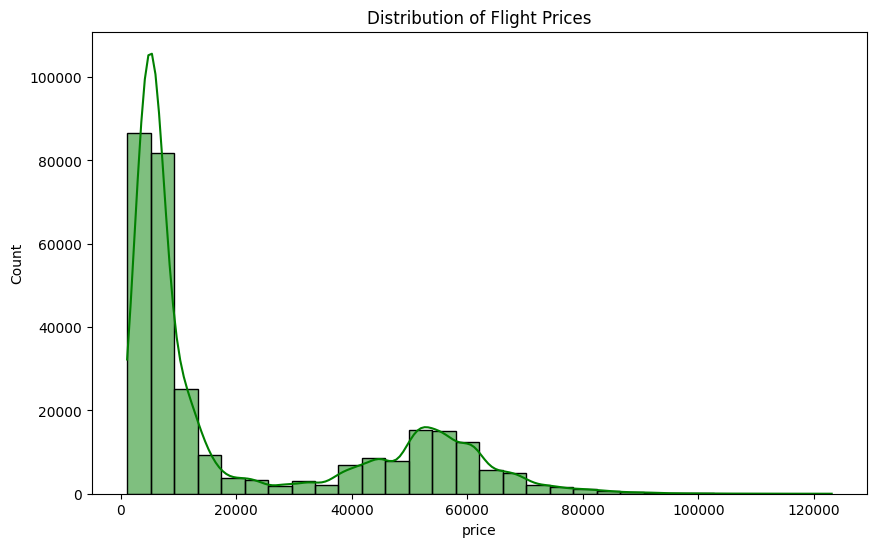

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title('Distribution of Flight Prices')
plt.show()

The distribution of flight prices is right-skewed, indicating that most flights have prices on the lower end, with a few flights having very high prices.

#### Number of Flights by Airline

/tmp/ipykernel_67883/2791165074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index, palette='viridis')


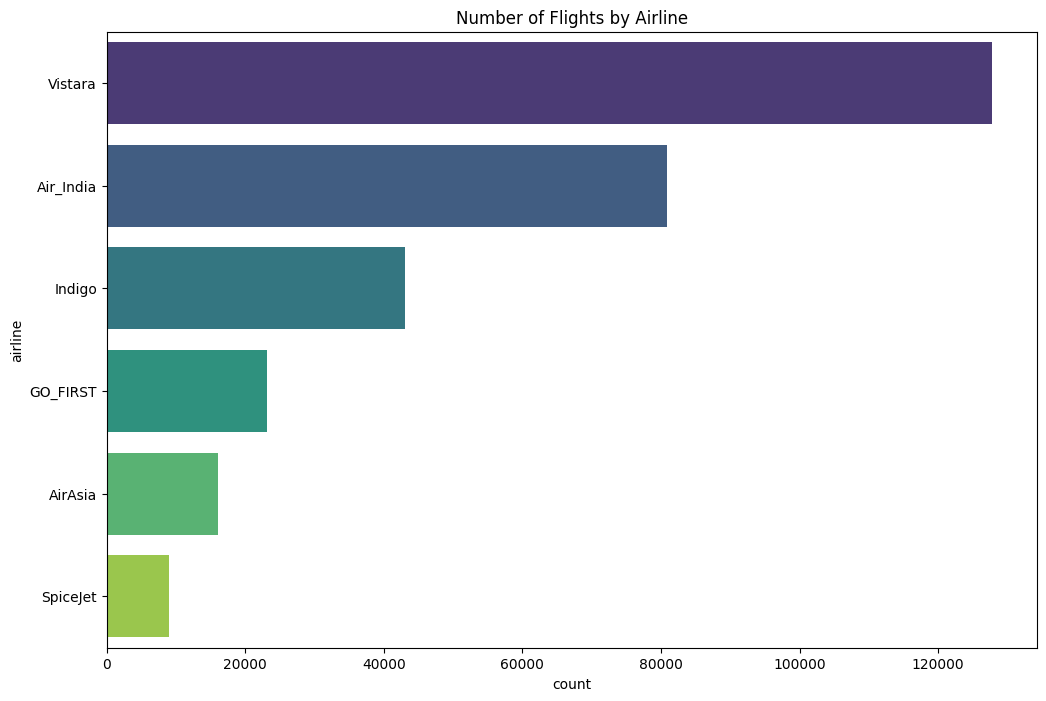

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index, palette='viridis')
plt.title('Number of Flights by Airline')
plt.show()

This plot shows the number of flights operated by each airline in the dataset. Vistara and Air India have the highest number of flights.

#### Number of Flights by Class

/tmp/ipykernel_67883/1039124390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='pastel')


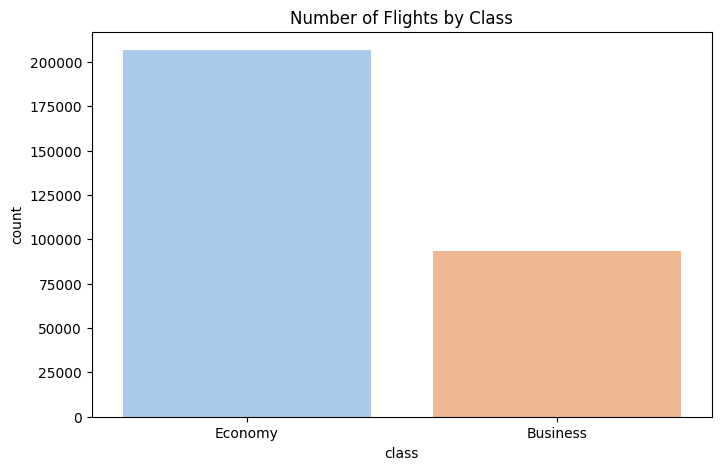

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df, palette='pastel')
plt.title('Number of Flights by Class')
plt.show()

This plot shows that the dataset contains significantly more Economy class flights than Business class flights.

### 3.2. Bivariate Analysis

#### Price Distribution by Airline

/tmp/ipykernel_67883/1005154617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns. barplot(x='airline', y='price', data=df, palette='Set2')


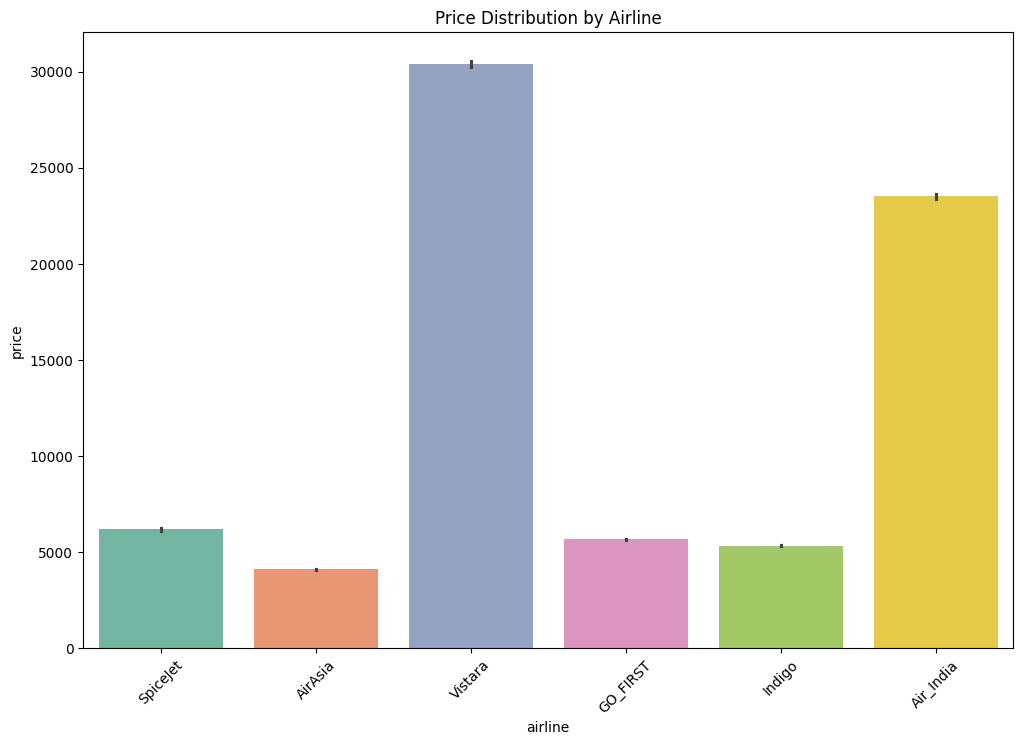

In [66]:
plt.figure(figsize=(12, 8))
sns. barplot(x='airline', y='price', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Distribution by Airline')
plt.show()

This box plot shows the distribution of prices for each airline. Vistara and Air India have a wider range of prices, which is consistent with them operating more flights. We can also see that some airlines have higher median prices than others.

#### Price Distribution by Class

/tmp/ipykernel_67883/2285635281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='price', data=df, palette='Set1')


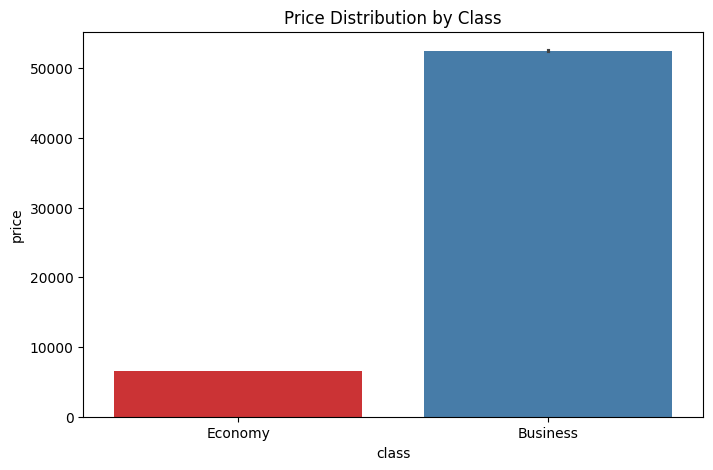

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(x='class', y='price', data=df, palette='Set1')
plt.title('Price Distribution by Class')
plt.show()

As expected, Business class flights are significantly more expensive than Economy class flights.

#### Price vs. Duration

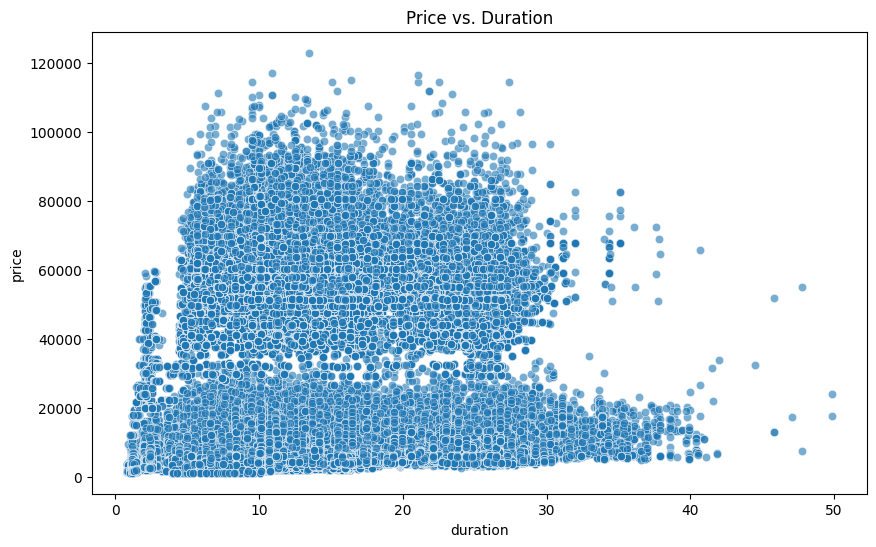

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.6)
plt.title('Price vs. Duration')
plt.show()

This scatter plot shows a positive correlation between the duration of the flight and its price. Longer flights tend to be more expensive.

#### Price vs. Days Left

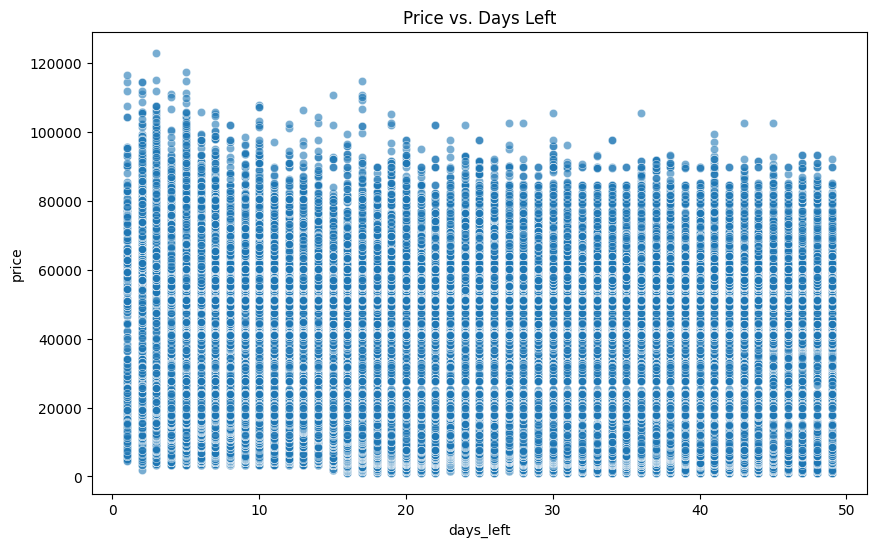

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.6)
plt.title('Price vs. Days Left')
plt.show()

This scatter plot shows that flight prices tend to increase as the departure date gets closer (i.e., as 'days_left' decreases).

#### Price vs. Number of Stops

/tmp/ipykernel_67883/1166425243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stops', y='price', data=df, palette='coolwarm')


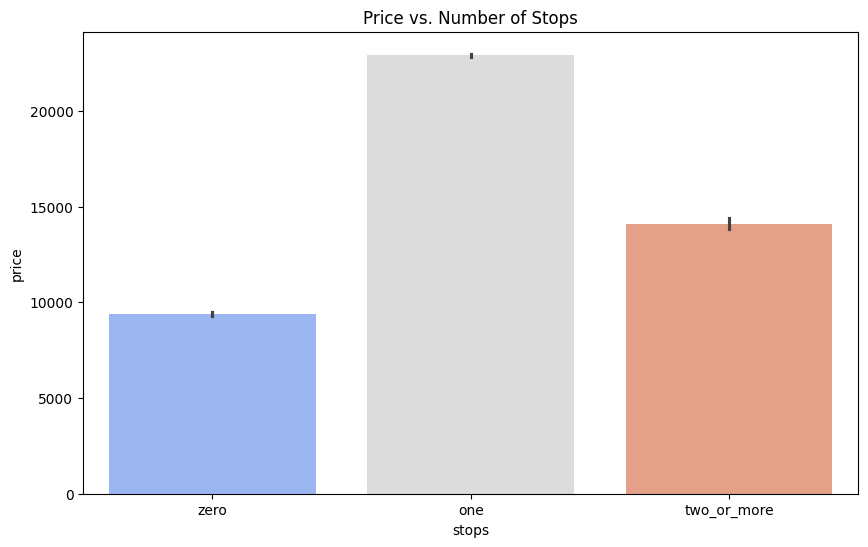

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='stops', y='price', data=df, palette='coolwarm')
plt.title('Price vs. Number of Stops')
plt.show()

This box plot shows the relationship between the number of stops and the price. Flights with one stop seem to have the highest median price.

## 4. Key Findings

- **Price Distribution:** The distribution of flight prices is skewed to the right, with most tickets being in the lower price range.- **Airlines:** Some airlines (like Vistara and Air India) have a wider price range, indicating they might operate in both premium and economy sectors. Some airlines have more flights than others.- **Class:** Business class tickets are significantly more expensive than economy class tickets.- **Duration:** There is a positive correlation between the duration of the flight and the price. Longer flights tend to be more expensive.- **Days Left:** The price of flights tends to increase as the number of days left for departure decreases.- **Stops:** Flights with one stop tend to have the highest median price, which might be counterintuitive. This could be due to longer routes that require a stop.

## 5. Deeper Analysis: Route Analysis

In [29]:
df['route'] = df['source_city'] + ' - ' + df['destination_city']

#### Most Popular Routes

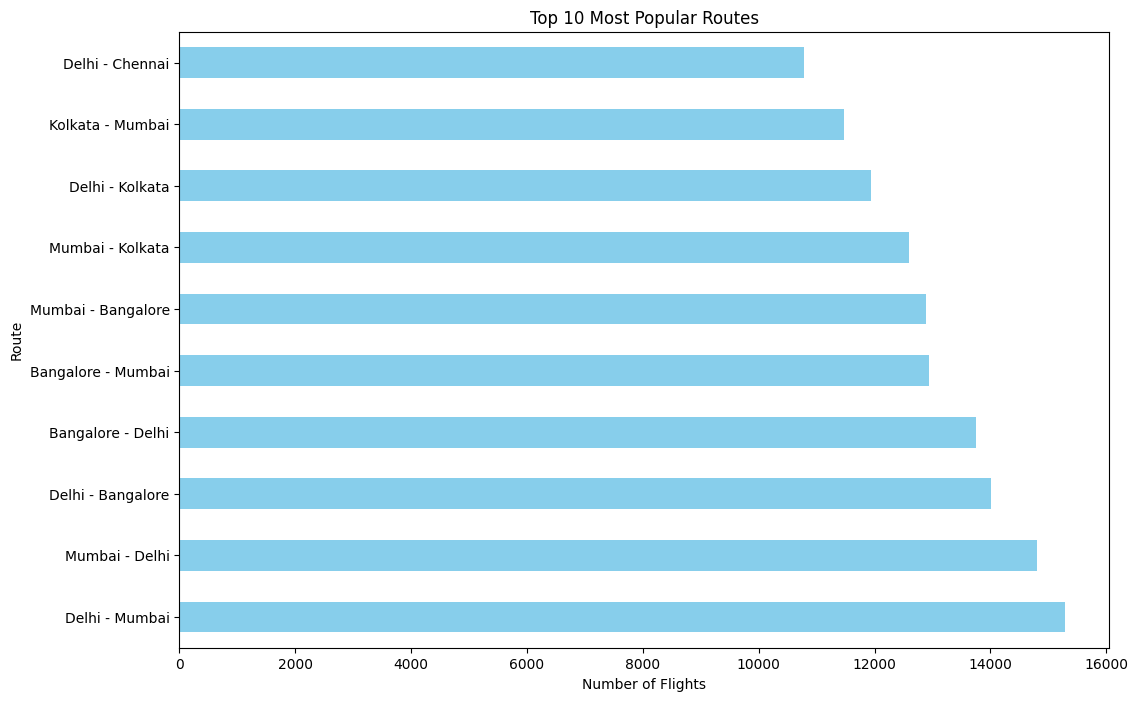

In [32]:
plt.figure(figsize=(12, 8))
df['route'].value_counts().nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

This plot shows the top 10 most frequent flight routes in the dataset.

#### Average Price by Route

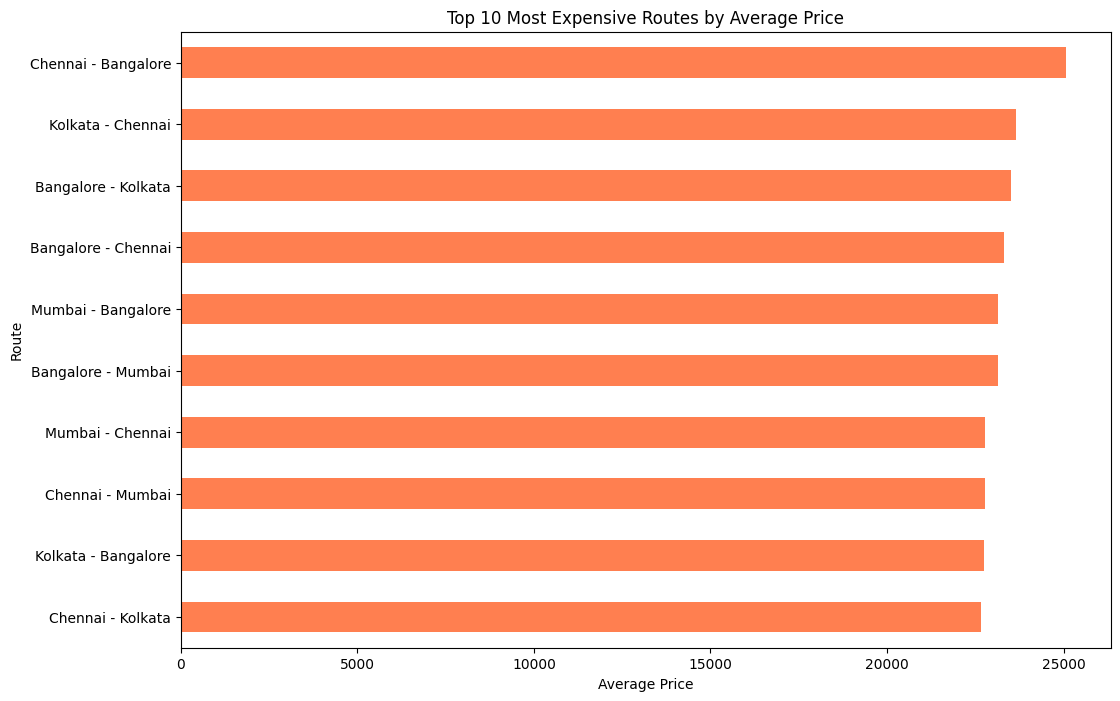

In [35]:
plt.figure(figsize=(12, 8))
df.groupby('route')['price'].mean().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='coral')
plt.title('Top 10 Most Expensive Routes by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Route')
plt.show()

This plot shows the top 10 most expensive routes based on the average ticket price.

## 6. Predictive Modeling: Price Prediction

In this section, we will build a simple regression model to predict flight prices based on the available features. This will help us understand which factors are most influential in determining the price.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Feature Engineering and Preprocessing

In [48]:
#Select features and target
features = ['airline', 'source_city', 'destination_city', 'stops', 'class', 'duration', 'days_left']
target = 'price'
X = df[features]
y = df[target]
# Identify categorical and numerical features
categorical_features = ['airline', 'source_city', 'destination_city', 'stops', 'class']
numerical_features = ['duration', 'days_left']
# Create a preprocessor for categorical features
preprocessor = ColumnTransformer( transformers=[('num', 'passthrough', numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'),categorical_features)])

### Model Training and Evaluation

In [49]:
# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

R-squared: 0.98
Mean Absolute Error: 1363.32


### Feature Importance

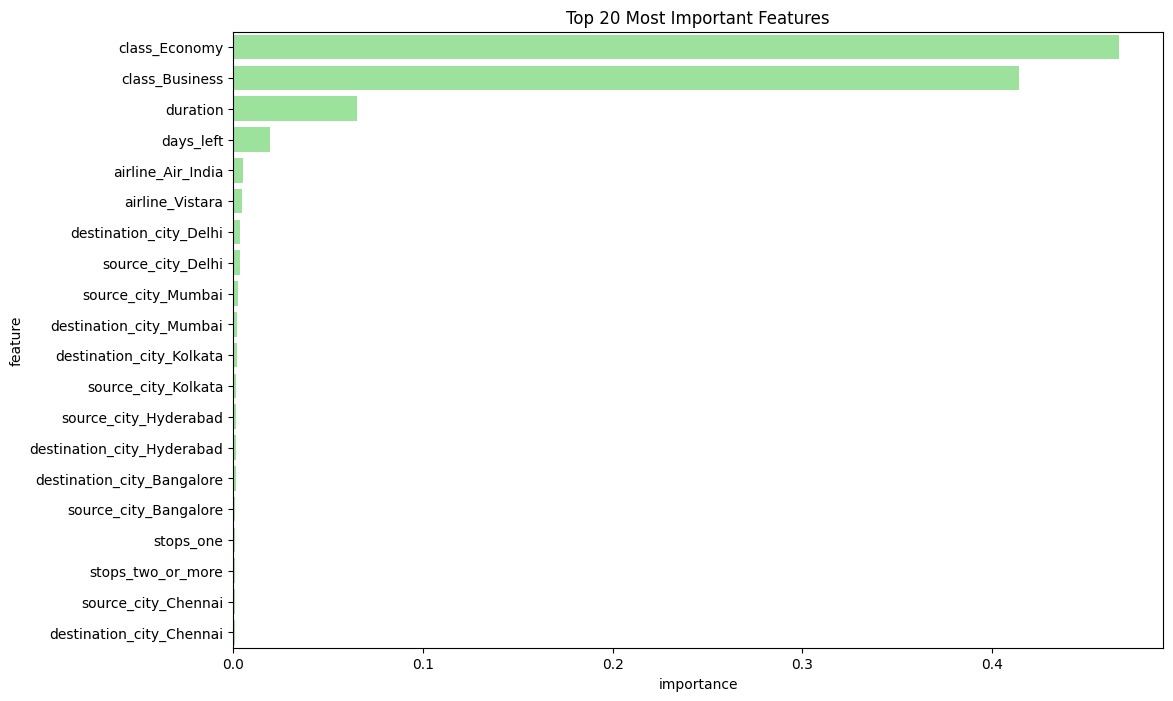

In [62]:
# Get feature importances
importances = model.named_steps['regressor'].feature_importances_
# Get feature names
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.nlargest(20, 'importance'),color ="lightgreen")
plt.title('Top 20 Most Important Features')
plt.show()

This plot shows the most important features for predicting the flight price. This gives us a good understanding of what factors drive the price the most.